Alumno: Escobar Sánchez José Alejandro, 19170573

para la materia de Inteligencia Artificial

# Ejemplo de Red Neuronal Artificial

Para convertir grados Celsius a Fahrenheit utilizando un dataset de 1000 equivalencias.

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importar el dataset de mis archivos de Google Drive y obtener una vista previa de los contenidos:

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/Colab Data/Celsius_Fahrenheit_dataset_1000.csv')

In [ ]:
temp_df.head()

,Celsius,Fahrenheit
0,-67,-88.6
1,40,104.0
2,-97,-142.6
3,57,134.6
4,-50,-58.0


In [ ]:
temp_df.describe()

,Celsius,Fahrenheit
count,1000.000000,1000.000000
mean,-0.029000,31.947800
std,57.334173,103.201511
min,-100.000000,-148.000000
25%,-50.000000,-58.000000
50%,-2.000000,28.400000
75%,50.000000,122.000000
max,100.000000,212.000000


Definir 'X' como los valores de entrada y 'y' como las salidas esperadas del modelo para evaluar.

In [ ]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

Utilizar Keras para agregar una neurona al modelo:

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1 , input_shape = [1]))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Aplicar el optimizador Adam y entrenar el modelo durante 500 épocas:

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 3ms/step - loss: 1690.7755
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 87.3276
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 3.3234
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 3.5547e-04
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0073e-05
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 8.1449e-07
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 4.3094e-08
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 2.3363e-09
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 3.3210e-10
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 9.5671e-11
Epoch

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

Graficar los cambios en las pérdidas a lo largo del entrenamiento:

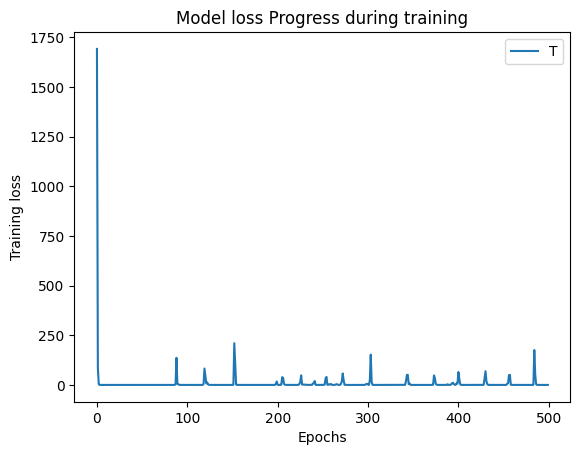

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Extraer los resultados: nótese que equivale a la fórmula tradicional para convertir de Celsius a Fahrenheit:

aprox. F = (1.8 * C + 32)

In [ ]:
model.get_weights()

[array([[1.7999997]], dtype=float32), array([31.999996], dtype=float32)]

Introducir un valor de C al modelo generado:

In [ ]:
Temp_C = 30
Temp_F = model.predict([Temp_C])
print(Temp_C, 'Celsius son', Temp_F[0][0], 'Fahrenheit según la red neuronal')

1/1 [==============================] - 0s 57ms/step
30 Celsius son 85.999985 Fahrenheit según la red neuronal


In [ ]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print(Temp_C, 'Celsius son', Temp_F, 'Fahrenheit según la red fórmula tradicional')

30 Celsius son 86.0 Fahrenheit según la red fórmula tradicional
